# Set up environment

In [1]:
library(tidyverse)
options(repr.plot.width=3, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
dir()

[1] "camp_teach.csv"                      
[2] "gplot_theme.R"                       
[3] "Hypothesis 01.ipynb"                 
[4] "Hypothesis 02.ipynb"                 
[5] "Output files.ipynb"                  
[6] "Project Summary and Hypothesis.ipynb"

In [3]:
source("gplot_theme.R")

# Read Data

In [5]:
dat_camp <- read_csv("camp_teach.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  TX = col_character(),
  TG = col_character(),
  GENDER = col_character(),
  ETHNIC = col_character(),
  hemog = col_double(),
  PREFEV = col_double(),
  PREFVC = col_double(),
  POSFEV = col_double(),
  POSFVC = col_double(),
  visitc = col_character()
)
See spec(...) for full column specifications.


# Preprocess

In [6]:
tmp <- dat_camp

# Treatment Group
tmp_map <-        c("bud", "ned", "plbo")
names(tmp_map) <- c("A",   "B",   "C")
tmp$TrtGrp <- tmp_map[tmp$TG]

# Exposed to Smoke
tmp1 <- ifelse(tmp$parent_smokes == 1, 1, 0)
tmp2 <- ifelse(tmp$any_smokes    == 1, 1, 0)
tmp$Expose_Smk <- ifelse((tmp1 + tmp2) > 0, "Exposed", "Not Exposed")

dat_camp_prep <- tmp
head(dat_camp_prep, 3)

TX,TG,id,age_rz,GENDER,ETHNIC,hemog,PREFEV,PREFVC,PREFF,⋯,agehome,anypet,woodstove,dehumid,parent_smokes,any_smokes,visitc,fdays,TrtGrp,Expose_Smk
ned,B,1,5,m,o,12.5,1.38,1.75,79,⋯,50,1,2,2,1,1,000,0,ned,Exposed
ned,B,1,5,m,o,NA,1.31,1.70,77,⋯,NA,NA,NA,NA,NA,NA,002,68,ned,NA
ned,B,1,5,m,o,NA,1.44,1.76,82,⋯,NA,NA,NA,NA,NA,NA,004,175,ned,NA


In [7]:
tmp <- dat_camp_prep

tmp <- tmp %>% filter(!is.na(PREFEV), !is.na(PREFEVPP))
tmp <- tmp %>% filter(visitc == "000")

dat_camp_base <- tmp

In [13]:
tmp <- dat_camp_prep

tmp <- tmp %>% filter(!is.na(PREFEV), !is.na(PREFEVPP))
tmp <- tmp %>% 
    group_by(id) %>%
    filter(visitc == max(visitc))

dat_camp_last <- tmp

In [14]:
head(dat_camp_last)

TX,TG,id,age_rz,GENDER,ETHNIC,hemog,PREFEV,PREFVC,PREFF,⋯,agehome,anypet,woodstove,dehumid,parent_smokes,any_smokes,visitc,fdays,TrtGrp,Expose_Smk
ned,B,1,5,m,o,NA,4.35,5.61,78,⋯,NA,NA,NA,NA,NA,NA,108,3288,ned,NA
ned,B,2,11,m,b,NA,2.92,3.89,75,⋯,NA,NA,NA,NA,NA,NA,108,3354,ned,NA
ned,B,4,7,f,w,NA,3.90,4.54,86,⋯,NA,NA,NA,NA,NA,NA,096,2935,ned,NA
ned,B,5,5,m,h,NA,2.80,3.45,81,⋯,NA,NA,NA,NA,NA,NA,108,3377,ned,NA
ned,B,6,13,m,w,NA,3.05,3.22,95,⋯,NA,NA,NA,NA,NA,NA,096,2875,ned,NA
bud,A,9,12,f,w,NA,3.28,5.19,63,⋯,NA,NA,NA,NA,NA,NA,108,3255,bud,NA


In [36]:
tmp1 <- dat_camp_base %>% 
    select(id, PREFEVPP, POSFEVPP, Expose_Smk) %>% 
    mutate(DIFF_FEVPP = POSFEVPP - PREFEVPP)

tmp2 <- dat_camp_last %>% 
    select(id, PREFEVPP, POSFEVPP) %>%
    mutate(DIFF_FEVPP = POSFEVPP - PREFEVPP)

tmp <- inner_join(tmp1, tmp2, by = "id", suffix = c("_base", "_last"))
dat_camp_base_last <- tmp
head(tmp)

id,PREFEVPP_base,POSFEVPP_base,Expose_Smk,DIFF_FEVPP_base,PREFEVPP_last,POSFEVPP_last,DIFF_FEVPP_last
1,81,91,Exposed,10,96,102,6
2,90,107,Exposed,17,88,102,14
4,104,110,Not Exposed,6,106,111,5
5,112,125,Not Exposed,13,98,109,11
9,109,121,Not Exposed,12,91,110,19
10,98,108,Not Exposed,10,98,107,9


In [37]:
print(length(unique(dat_camp_prep$id)))
print(nrow(dat_camp_base))
print(nrow(dat_camp_base_last))

[1] 695
[1] 686
[1] 686


In [9]:
colnames(dat_camp)

[1] "TX"            "TG"            "id"            "age_rz"       
 [5] "GENDER"        "ETHNIC"        "hemog"         "PREFEV"       
 [9] "PREFVC"        "PREFF"         "PREPF"         "POSFEV"       
[13] "POSFVC"        "POSFF"         "POSPF"         "PREFEVPP"     
[17] "PREFVCPP"      "POSFEVPP"      "POSFVCPP"      "wbc"          
[21] "agehome"       "anypet"        "woodstove"     "dehumid"      
[25] "parent_smokes" "any_smokes"    "visitc"        "fdays"

# Hypothesis

- (2) **Exposure to smoking is associated with change in lung function from baseline to the last observation for each child**
    - a. as measured by the difference in pre-bronchodilator FEV1PP and
    - b. as measured by change in FEV1PP after bronchodilator in children with asthma.

In [38]:
head(dat_camp_base_last, 2)

id,PREFEVPP_base,POSFEVPP_base,Expose_Smk,DIFF_FEVPP_base,PREFEVPP_last,POSFEVPP_last,DIFF_FEVPP_last
1,81,91,Exposed,10,96,102,6
2,90,107,Exposed,17,88,102,14


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”

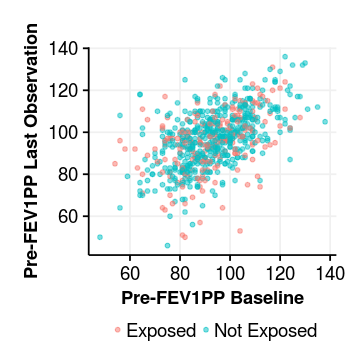

In [39]:
options(repr.plot.width=3, repr.plot.height=3)

tmp <- dat_camp_base_last

gp <- ggplot(tmp, aes(x = PREFEVPP_base, y = PREFEVPP_last, color = Expose_Smk)) + 
    geom_point(size = 1, alpha = 0.5) +
    xlab("Pre-FEV1PP Baseline") +
    ylab("Pre-FEV1PP Last Observation") +
    theme_Publication() +
    theme(
        legend.title = element_blank(),
        axis.title.y = element_text(size = 11),
        axis.title.x = element_text(size = 11))
gp

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”

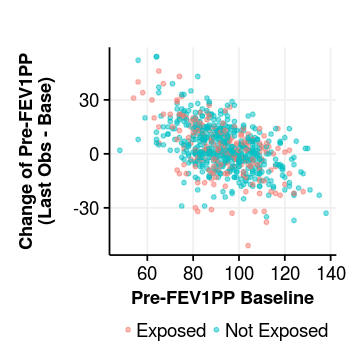

In [41]:
options(repr.plot.width=3, repr.plot.height=3)

tmp <- dat_camp_base_last
tmp <- tmp %>% mutate(DIFF_FEVPP = PREFEVPP_last - PREFEVPP_base)

gp <- ggplot(tmp, aes(x = PREFEVPP_base, y = DIFF_FEVPP, color = Expose_Smk)) + 
    geom_point(size = 1, alpha = 0.5) +
    ylab("Change of Pre-FEV1PP\n(Last Obs - Base)") +
    xlab("Pre-FEV1PP Baseline") +
    theme_Publication() +
    theme(
        legend.title = element_blank(),
        axis.title.y = element_text(size = 11),
        axis.title.x = element_text(size = 11))
gp

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”

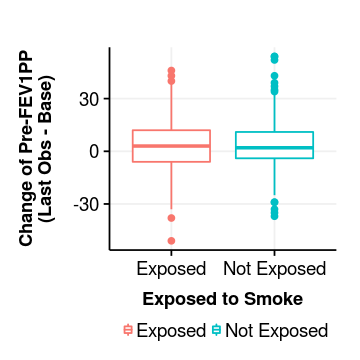

In [43]:
options(repr.plot.width=3, repr.plot.height=3)

tmp <- dat_camp_base_last
tmp <- tmp %>% mutate(DIFF_FEVPP = PREFEVPP_last - PREFEVPP_base)

gp <- ggplot(tmp, aes(x = Expose_Smk, y = DIFF_FEVPP, color = Expose_Smk)) + 
    geom_boxplot() +
    ylab("Change of Pre-FEV1PP\n(Last Obs - Base)") +
    xlab("Exposed to Smoke") +
    theme_Publication() +
    theme(
        legend.title = element_blank(),
        axis.title.y = element_text(size = 11),
        axis.title.x = element_text(size = 11))
gp

-----

- (2) **Exposure to smoking is associated with change in lung function from baseline to the last observation for each child**
    - a. as measured by the difference in pre-bronchodilator FEV1PP and
    - b. as measured by change in FEV1PP after bronchodilator in children with asthma.

In [44]:
head(dat_camp_base_last)

id,PREFEVPP_base,POSFEVPP_base,Expose_Smk,DIFF_FEVPP_base,PREFEVPP_last,POSFEVPP_last,DIFF_FEVPP_last
1,81,91,Exposed,10,96,102,6
2,90,107,Exposed,17,88,102,14
4,104,110,Not Exposed,6,106,111,5
5,112,125,Not Exposed,13,98,109,11
9,109,121,Not Exposed,12,91,110,19
10,98,108,Not Exposed,10,98,107,9


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”Warning message:
“Removed 4 rows containing missing values (geom_point).”

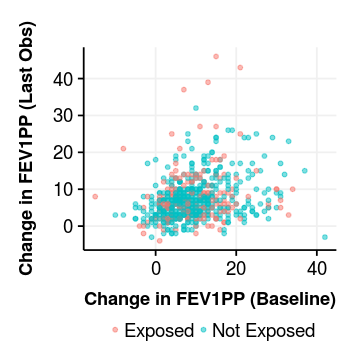

In [48]:
options(repr.plot.width=3, repr.plot.height=3)

tmp <- dat_camp_base_last

gp <- ggplot(tmp, aes(x = DIFF_FEVPP_base, y = DIFF_FEVPP_last, color = Expose_Smk)) + 
    geom_point(size = 1, alpha = 0.5) +
    xlab("Change in FEV1PP (Baseline)") +
    ylab("Change in FEV1PP (Last Obs)") +
    theme_Publication() +
    theme(
        legend.title = element_blank(),
        axis.title.y = element_text(size = 11),
        axis.title.x = element_text(size = 11))
gp

In [ ]:
options(repr.plot.width=3, repr.plot.height=3)

tmp <- dat_camp_base_last
tmp <- tmp %>% mutate()

gp <- ggplot(tmp, aes(x = Expose_Smk, y = DIFF_FEVPP_last, color = Expose_Smk)) + 
    geom_point(size = 1, alpha = 0.5) +
    xlab("Change in FEV1PP (Baseline)") +
    ylab("Change in FEV1PP (Last Obs)") +
    theme_Publication() +
    theme(
        legend.title = element_blank(),
        axis.title.y = element_text(size = 11),
        axis.title.x = element_text(size = 11))
gp